# 1. Exploratory Data Analysis (EDA)

## Project Goal
The primary goal of this project is to develop an end-to-end machine learning platform that predicts customer churn for a telecom company. This analysis is the first step in building a robust **ML model** for **prediction**, ultimately aimed at understanding and reducing customer **churn**.

## Vision
Our vision is to empower telecom businesses to proactively identify customers at risk of churn, optimize retention strategies, and make data-driven decisions. This platform will integrate model training, experiment tracking, and business **KPI** (Key Performance Indicator) evaluation to demonstrate the real-world business **impact** of our predictions.

---

## 1.1 Dataset Overview

In this notebook, we will perform a comprehensive exploratory data analysis on the Telco Customer Churn dataset. The dataset contains information about:
- Customer demographics (gender, age, partners, dependents)
- Account information (tenure, contract type, payment method, billing)
- Services subscribed to by each customer (phone, multiple lines, internet, online security, etc.)
- The target variable, `Churn`, which indicates whether the customer left the company within the last month.

## 1.2 Analysis Plan

Our EDA will cover the following key steps:
- **Initial Data Inspection:** Check data types, identify missing values, and understand the basic structure of the dataset.
- **Univariate Analysis:** Analyze the distribution of individual features (e.g., tenure, monthly charges, contract type) using histograms and count plots.
- **Bivariate Analysis:** Explore the relationship between features and the target variable (`Churn`). We'll investigate how different factors like contract type, payment method, and monthly charges influence the likelihood of churn.
- **Insights for Feature Engineering:** Based on our findings, we will identify potential new features to create and strategies to handle categorical and numerical data in the next steps of our **end-to-end ML pipeline**.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("data/raw/Telco_Customer_Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.shape

(7043, 21)

### Dataset shape
~ Dataset has 7043 rows and 21 Columns (Feature)

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
print("Duplicates in df: ", df.duplicated().sum())


Duplicates in df:  0


In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

TotalCharges column needs to be changed from object to int/float datatype

In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")
df['TotalCharges'].dtype

dtype('float64')

In [12]:
df['TotalCharges'].isnull().sum()

np.int64(11)

Few null values in Total charges , replacing using Median

In [13]:
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)
df["TotalCharges"].isnull().sum()

C:\Users\MIHIR\AppData\Local\Temp\ipykernel_21176\1400652156.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


np.int64(0)

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [15]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [16]:
for col in ["gender", "SeniorCitizen","Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService","OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract","PaperlessBilling", "PaymentMethod", "Churn"]:
    print(f"{col} -> {df[col].unique().tolist()}")


gender -> ['Female', 'Male']
SeniorCitizen -> [0, 1]
Partner -> ['Yes', 'No']
Dependents -> ['No', 'Yes']
PhoneService -> ['No', 'Yes']
MultipleLines -> ['No phone service', 'No', 'Yes']
InternetService -> ['DSL', 'Fiber optic', 'No']
OnlineSecurity -> ['No', 'Yes', 'No internet service']
OnlineBackup -> ['Yes', 'No', 'No internet service']
DeviceProtection -> ['No', 'Yes', 'No internet service']
TechSupport -> ['No', 'Yes', 'No internet service']
StreamingTV -> ['No', 'Yes', 'No internet service']
StreamingMovies -> ['No', 'Yes', 'No internet service']
Contract -> ['Month-to-month', 'One year', 'Two year']
PaperlessBilling -> ['Yes', 'No']
PaymentMethod -> ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
Churn -> ['No', 'Yes']


As we will be using 2 ML models 
1-Logistic Regression
2-Random forest 
for logistic regression we need to one-hot encode categorical columns 
For Random forest we need to Label encode categorical columns 
We will keep both encoded df seperate from original dataset


### Dropping unecessary columns

In [17]:
df = df.drop("customerID", axis=1)
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Mapping "SeniorCitizen" to Yes/No for Visual analysis

In [18]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)


['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


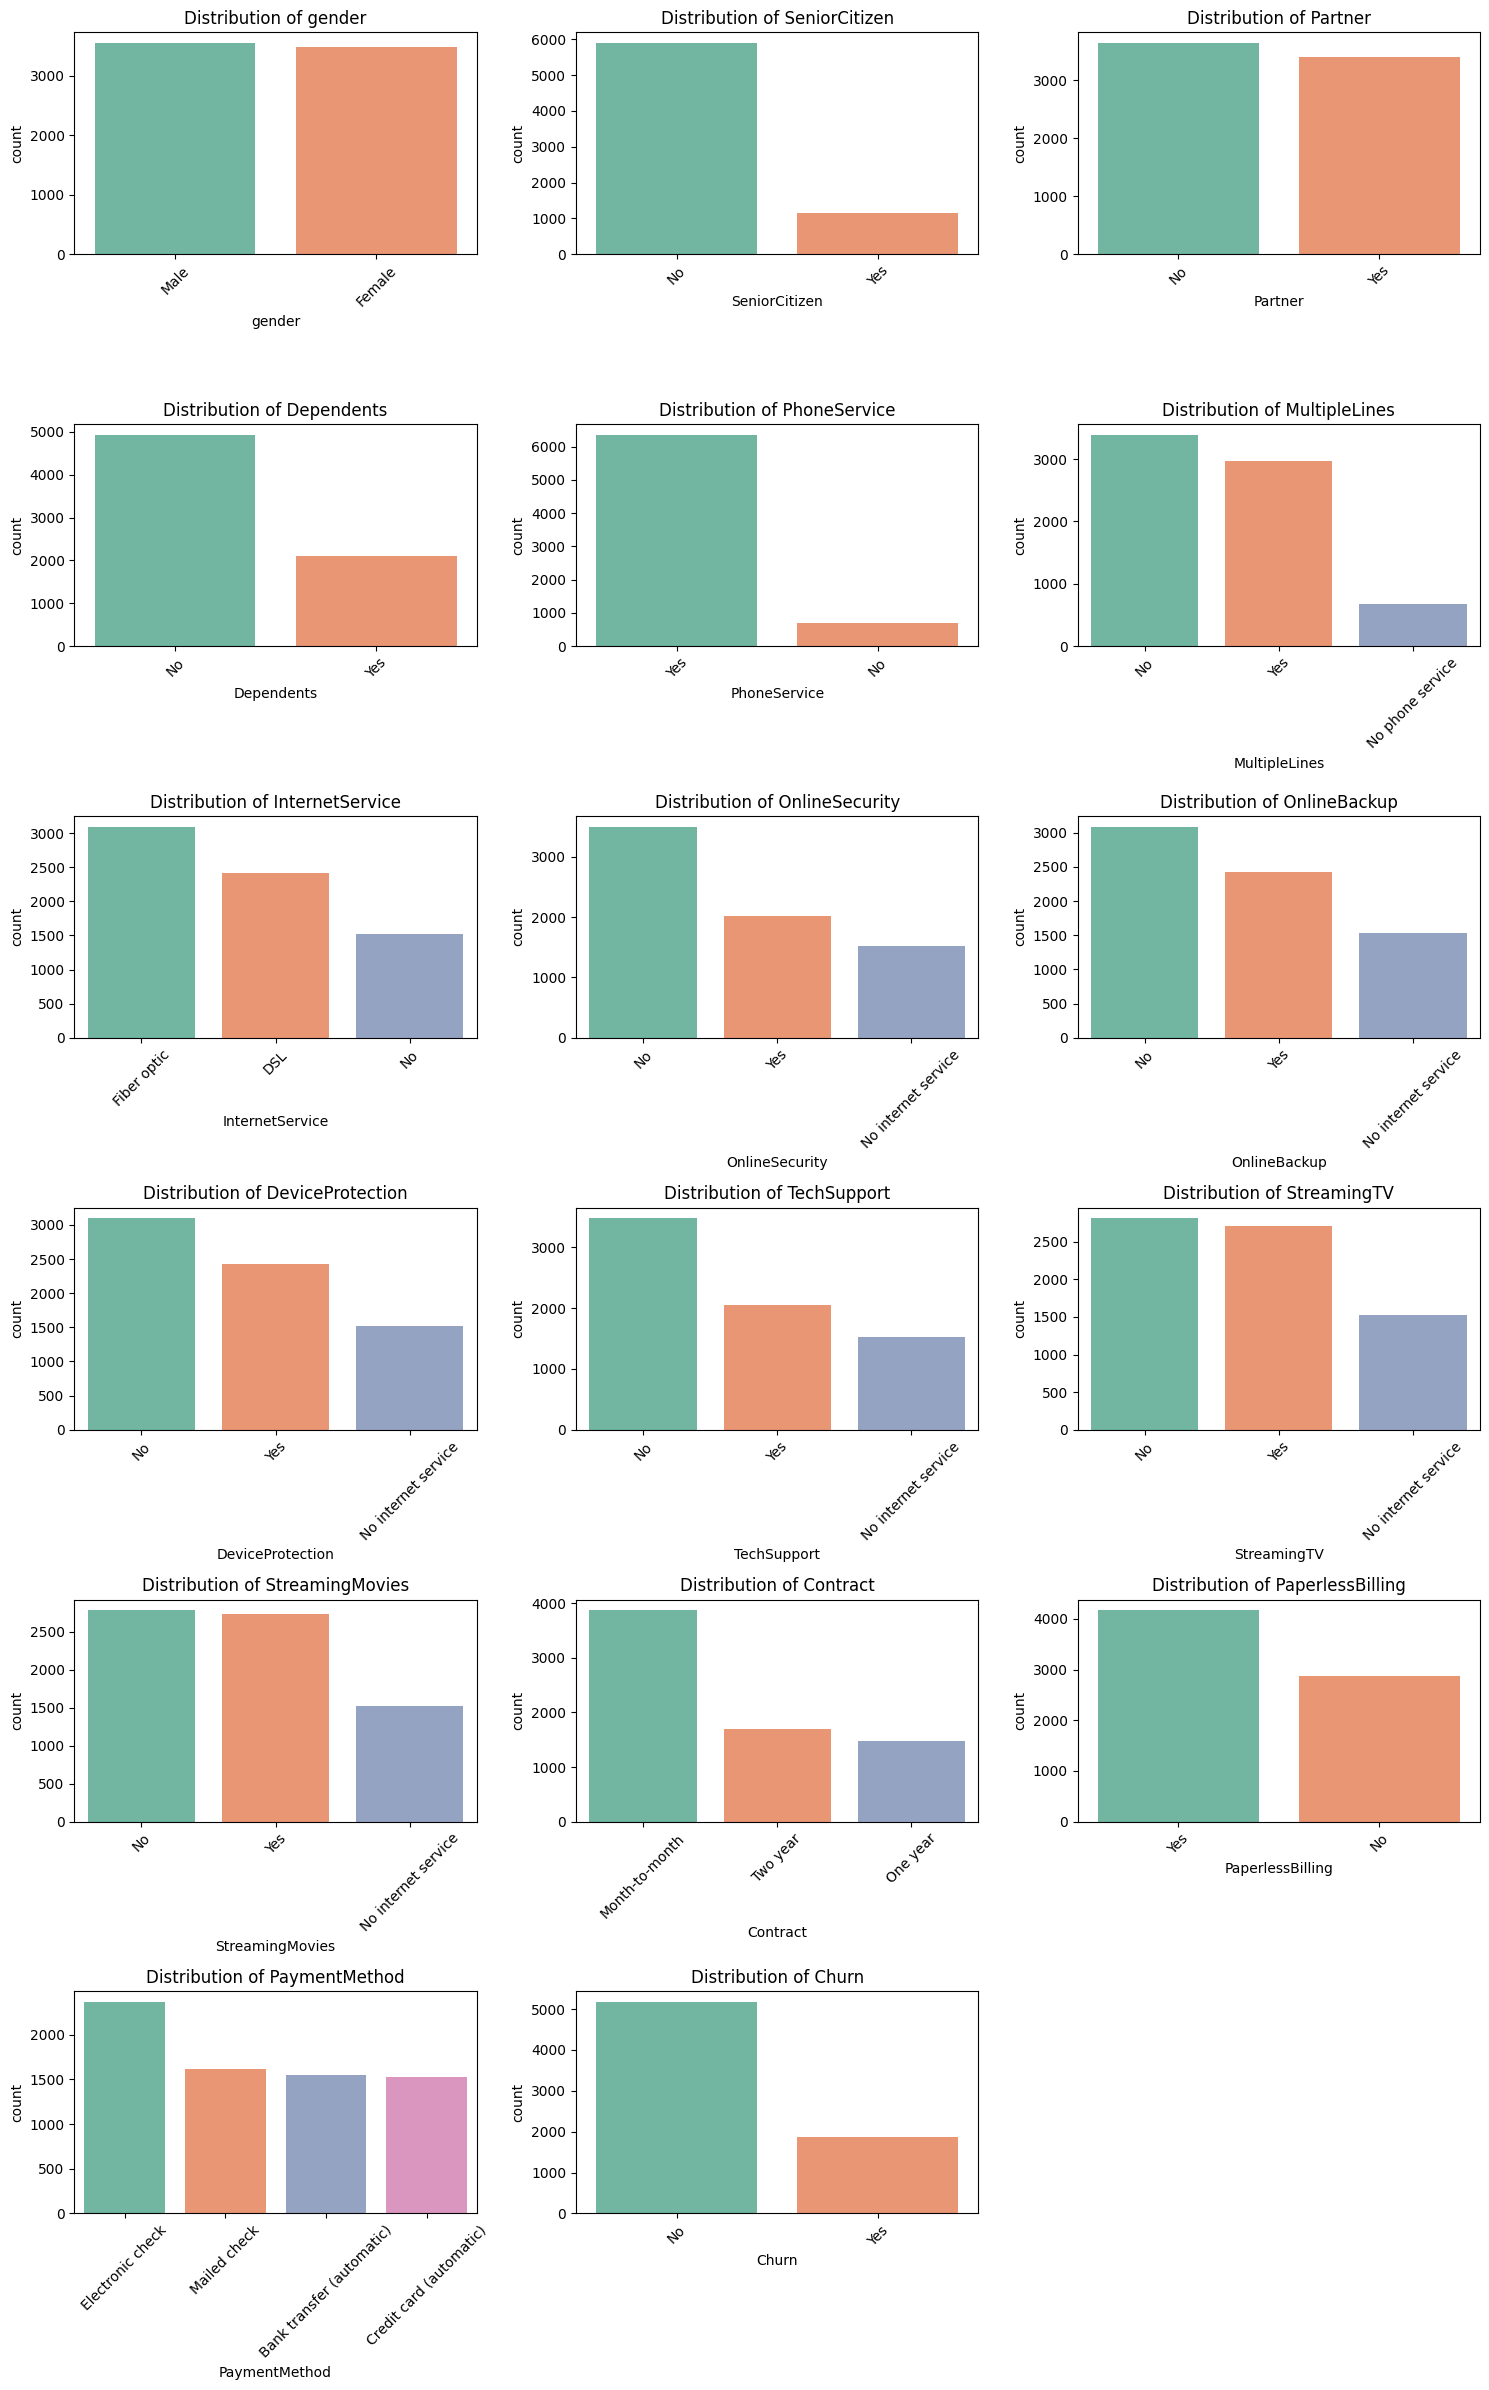

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


n = len(categorical_cols)


rows = (n // 3) + (n % 3 > 0)   
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(15, 4*rows))
axes = axes.flatten()


for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2", ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Categorical visuals — short summary

- **Gender:** roughly balanced.
- **SeniorCitizen:** mostly **No**.
- **Partner / Dependents:** slightly more **No**; most customers have **no dependents**.
- **PhoneService:** mostly **Yes**; **MultipleLines:** **No > Yes**, few with “no phone service”.
- **InternetService:** **Fiber optic** most common, then **DSL**, some **No internet**.
- **Add-ons (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport):** majority **No**.
- **StreamingTV/Movies:** near split, **No** slightly higher; some “no internet service”.
- **Contract:** dominated by **Month-to-month**; fewer **One-/Two-year**.
- **PaperlessBilling:** majority **Yes**.
- **PaymentMethod:** **Electronic check** largest; others fairly even.
- **Churn:** mostly **No**; about a **quarter** **Yes** (moderate class imbalance).


In [21]:
df['Churn'].isnull().sum()

np.int64(0)

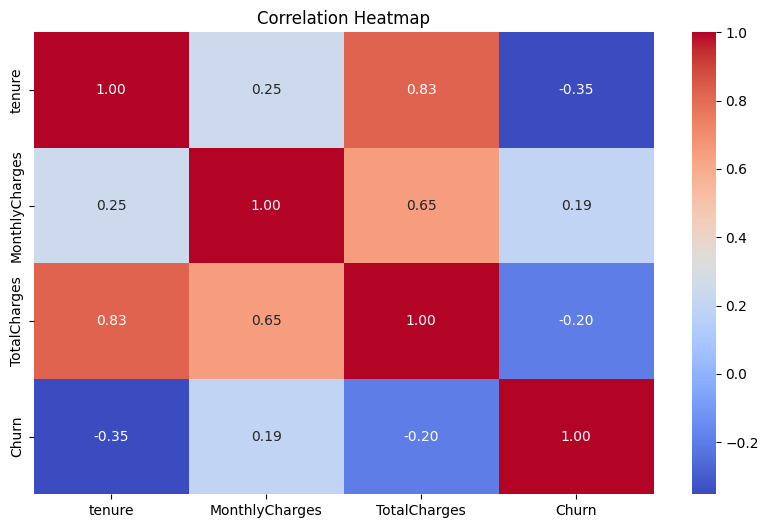

In [22]:

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}).astype(int)

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

### Correlation Insights
- **Tenure & TotalCharges** (0.83): Strong positive correlation, which makes sense since longer tenure means higher total charges.  
- **MonthlyCharges & TotalCharges** (0.65): Moderate positive correlation, as higher monthly charges lead to higher totals.  
- **Tenure & Churn** (-0.35): Negative correlation → customers with longer tenure are less likely to churn.  
- **MonthlyCharges & Churn** (0.19): Weak positive correlation → higher monthly charges slightly increase churn risk.  
- **TotalCharges & Churn** (-0.20): Weak negative correlation → lower total charges are somewhat linked with churn.  


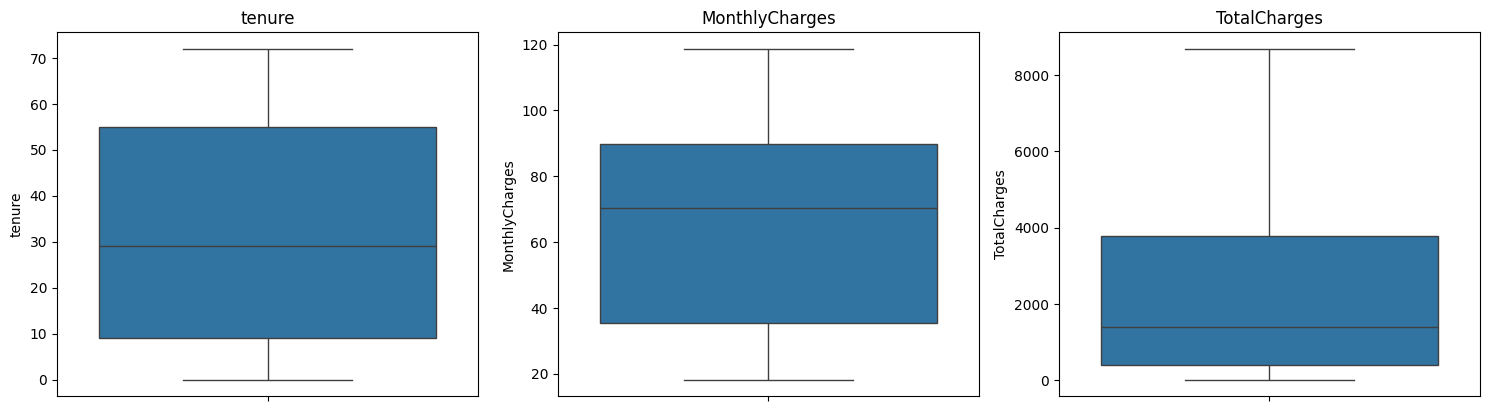

In [23]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = num_cols.drop('Churn')

plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//3 + 1, 3, i)  # arrange in grid
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

### Outlier & Distribution Insights
- **Tenure**: Fairly even spread from 0–72 months, no major outliers. Median around 30 months.  
- **MonthlyCharges**: Range from ~18 to ~120. Some higher values may act like mild outliers, but mostly consistent spread.  
- **TotalCharges**: Wider spread, with some clear high-value outliers (> 8000). This makes sense as it depends on both tenure and monthly charges.  


In [24]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [25]:
df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [26]:
df.to_csv("telco_cleaned.csv")

### Exported the cleaned df into CSV for encoding and baseline ML